Polynomial Regression

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import train_test_split

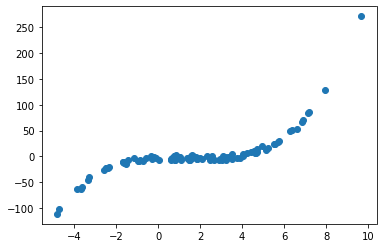

In [52]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

plt.scatter(x, y)

In [53]:
x=x[:,np.newaxis]
y=y[:,np.newaxis]

In [54]:
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)

In [55]:
model=LinearRegression()
model.fit(x_poly,y)
y_poly_pred=model.predict(x_poly)

In [56]:
np.sqrt(mean_squared_error(y,y_poly_pred))

3.0727436082084223

In [57]:
r2_score(y,y_poly_pred)

0.9944087624623351

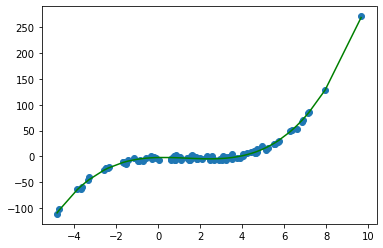

In [58]:
plt.scatter(x, y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='g')
plt.show()

Applying Polynomial Regression to the Housing dataset

In [61]:
from sklearn.datasets import load_boston
import seaborn as sns
bost_data=load_boston()

boston=pd.DataFrame(bost_data.data,columns=bost_data.feature_names)
boston['MEDV']=bost_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


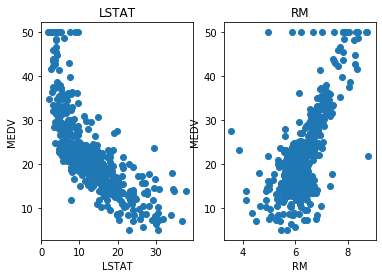

In [62]:
#Variation of features with target

features=['LSTAT','RM']
target=boston['MEDV']

i=0
for col in features:
    plt.subplot(1,len(features),i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    i+=1

In [63]:
x=pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
y=boston['MEDV']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [67]:
x_train_poly=pf.fit_transform(x_train)

In [68]:
model.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
x_test_poly=pf.fit_transform(x_test)
y_pred=model.predict(x_test_poly)

In [71]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.340496574451524

In [72]:
r2_score(y_test,y_pred)

0.7770778596202321

Better than Linear Regression